# Titanic example

In [303]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

from toolbox import DataFrameImputer, BinaryEncoder

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score

import xgboost as xgb

from category_encoders import SumEncoder

# Read data in

In [179]:
df = pd.read_csv('train.csv').set_index('PassengerId')
df_validation = pd.read_csv('test.csv').set_index('PassengerId')

In [178]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [308]:
df.Survived.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [310]:
df[['Survived']].head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [182]:
df['Ticket1'] = df.Ticket.apply(lambda x: len(x.split()))

In [293]:
df['Surname'] = df.Name.str.split(',').apply(lambda x: x[0].strip().upper())
df['Forename'] = df.Name.str.split(',').apply(lambda x: x[1].split('.')[1].strip().upper())
df['Title'] = df.Name.str.split(',').apply(lambda x: x[1].split('.')[0].strip().upper())

In [304]:
se = SumEncoder()

In [307]:
se.fit_transform(df[['Title']], df.Survived)

,col_Title_0,col_Title_1,col_Title_2,col_Title_3,col_Title_4,col_Title_5,col_Title_6,col_Title_7,col_Title_8,col_Title_9,col_Title_10,col_Title_11,col_Title_12,col_Title_13,col_Title_14,col_Title_15,col_Title_16
PassengerId,,,,,,,,,,,,,,,,,
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [289]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked,Title,Surname,Forename
count,891,891,891,204,889,891,891,891
unique,891,2,681,147,3,17,667,799
top,"Oreskovic, Mr. Luka",male,CA. 2343,B96 B98,S,MR,ANDERSSON,JOHN
freq,1,577,7,4,644,517,9,9


In [287]:
dict(df.Title.value_counts())

{'CAPT': 1,
 'COL': 2,
 'DON': 1,
 'DR': 7,
 'JONKHEER': 1,
 'LADY': 1,
 'MAJOR': 2,
 'MASTER': 40,
 'MISS': 182,
 'MLLE': 2,
 'MME': 1,
 'MR': 517,
 'MRS': 125,
 'MS': 1,
 'REV': 6,
 'SIR': 1,
 'THE COUNTESS': 1}

In [292]:
pd.DataFrame(df.groupby(['Title']).Survived.sum() / df.groupby(['Title']).Survived.count())
# sns.factorplot(data=df,x='Sex', y='Survived',hue='Title', kind='bar',size=10)

,Survived
Title,
CAPT,0.000000
COL,0.500000
DON,0.000000
DR,0.428571
JONKHEER,0.000000
LADY,1.000000
MAJOR,0.500000
MASTER,0.575000
MISS,0.697802


In [251]:
df[df.Title == 'DR.']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket1,Title
PassengerId,,,,,,,,,,,,,
246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,1,DR.
318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,1,DR.
399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,1,DR.
633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,1,DR.
661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,2,DR.
767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,1,DR.
797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,1,DR.


In [186]:
df[df.Ticket1 == 2]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket1
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,2
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,2
31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,2
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,2
34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,2
35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,2


In [2]:
drop_col = ['Ticket','Cabin', 'Name']
df = df.drop(drop_col, axis=1)
df_validation = df_validation.drop(drop_col, axis=1) 

In [3]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [75]:
df[df.Age < 80].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,445.792135,0.383146,2.310112,29.642600,0.523596,0.382022,32.206685
std,257.423695,0.486427,0.835388,12.899351,1.103224,0.806409,49.721315
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.250000,0.000000,2.000000,22.000000,0.000000,0.000000,7.903100
50%,445.500000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.750000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,74.000000,8.000000,6.000000,512.329200


In [73]:
df_validation.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.154603,0.447368,0.392344,35.619000
std,120.810458,0.841838,12.636666,0.896760,0.981429,55.840751
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [5]:
df.describe(include=['O'])

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [8]:
dict(df.isnull().sum())

{'Age': 177,
 'Embarked': 2,
 'Fare': 0,
 'Parch': 0,
 'PassengerId': 0,
 'Pclass': 0,
 'Sex': 0,
 'SibSp': 0,
 'Survived': 0}

# Data cleaning

In [9]:
dfi = DataFrameImputer()
df = dfi.fit_transform(df)
dict(df.isnull().sum())

{'Age': 0,
 'Embarked': 0,
 'Fare': 0,
 'Parch': 0,
 'PassengerId': 0,
 'Pclass': 0,
 'Sex': 0,
 'SibSp': 0,
 'Survived': 0}

In [10]:
df_validation = dfi.transform(df_validation)
dict(df_validation.isnull().sum())

{'Age': 0,
 'Embarked': 0,
 'Fare': 0,
 'Parch': 0,
 'PassengerId': 0,
 'Pclass': 0,
 'Sex': 0,
 'SibSp': 0}

# Visualisation

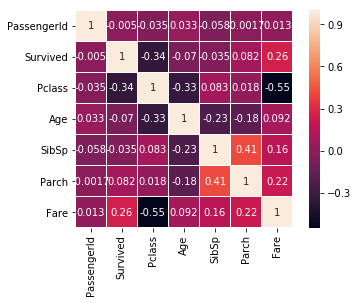

In [50]:
sns.heatmap(df.corr(),
            linewidths=0.1,
            vmax=1.0, 
            square=True, linecolor='white', annot=True)

# Categorical features

In [11]:
categorical_features = ['Sex', 'Embarked', 'Parch']

In [12]:
df_dummies = pd.get_dummies(df, columns=categorical_features)
df_dummies.head()

,PassengerId,Survived,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,3,22.0,1,7.2500,0,1,0,0,1,1,0,0,0,0,0,0
1,2,1,1,38.0,1,71.2833,1,0,1,0,0,1,0,0,0,0,0,0
2,3,1,3,26.0,0,7.9250,1,0,0,0,1,1,0,0,0,0,0,0
3,4,1,1,35.0,1,53.1000,1,0,0,0,1,1,0,0,0,0,0,0
4,5,0,3,35.0,0,8.0500,0,1,0,0,1,1,0,0,0,0,0,0


In [13]:
se = SumEncoder(include=categorical_features)
df_sum_encode = se.fit_transform(df, df.Survived) 
df_sum_encode_validation = se.transform(df_validation)
print(dict(df_sum_encode.isnull().sum()))
print(dict(df_sum_encode_validation.isnull().sum()))
df_validation[df_sum_encode_validation.Parch.isnull()]

{'PassengerId': 0, 'Embarked': 0, 'SibSp': 0, 'Parch': 0, 'Survived': 0, 'Fare': 0, 'Age': 0, 'Sex': 0, 'Pclass': 0}
{'PassengerId': 0, 'Embarked': 0, 'SibSp': 0, 'Parch': 2, 'Fare': 0, 'Age': 0, 'Sex': 0, 'Pclass': 0}


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
342,1234,3,male,29.699118,1,9,69.55,S
365,1257,3,female,29.699118,1,9,69.55,S


In [14]:
def sum_coding(df_base, df, predictor, response='Survived'):
    df_grouped_sum = df_base.groupby(predictor)[response].sum()
    df_grouped_sum_scaled = df_grouped_sum / df_grouped_sum.max()
    return df[predictor].map(df_grouped_sum_scaled)

df_sum_encode = df.copy()
df_sum_encode_validation = df_validation.copy()
joined_df = df.append(df_validation)

for c_f in categorical_features:    
    df_sum_encode[c_f] = sum_coding(df, df_sum_encode, c_f)
    df_sum_encode_validation[c_f] = sum_coding(df, df_sum_encode_validation, c_f)
print(df_sum_encode.info())
print('-'*40)
print(df_sum_encode_validation.info())
df_sum_encode.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null float64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null float64
Fare           891 non-null float64
Embarked       891 non-null float64
dtypes: float64(5), int64(4)
memory usage: 62.7 KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null float64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          416 non-null float64
Fare           418 non-null float64
Embarked       418 non-null float64
dtypes: float64(5), int64(3)
memory usage: 26.2 KB
None


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0.467811,22.0,1,1.0,7.2500,1.000000
1,2,1,1,1.000000,38.0,1,1.0,71.2833,0.424658
2,3,1,3,1.000000,26.0,0,1.0,7.9250,1.000000
3,4,1,1,1.000000,35.0,1,1.0,53.1000,1.000000
4,5,0,3,0.467811,35.0,0,1.0,8.0500,1.000000


In [15]:
df_sum_encode_validation.Parch = df_sum_encode_validation.Parch.fillna(0)

In [16]:
sex_map = {'male' : 0, 'female' : 1}
embarked_map = {'C' : 0, 'Q' : 1, 'S' : 2}

df_order_coding = df.copy()
df_order_coding.Sex = df_order_coding.Sex.map(sex_map)
df_order_coding.Embarked = df_order_coding.Embarked.map(embarked_map)
df_order_coding.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,0
2,3,1,3,1,26.0,0,0,7.9250,2
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,2


# Data exploration

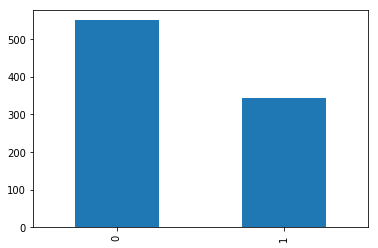

In [17]:
df.Survived.value_counts().plot.bar()

                 PassengerId  Pclass           Age  SibSp  Parch        Fare
Survived Sex                                                                
0        female        35223     231   2107.885000     98     84   1864.9752
         male         210189    1159  14590.004706    206     97  10277.7447
1        female       100120     447   6752.168235    120    120  12101.6876
         male          51854     220   3011.855882     42     39   4449.5418


Survived  Sex   
0         female    Axes(0.125,0.125;0.775x0.755)
          male      Axes(0.125,0.125;0.775x0.755)
1         female    Axes(0.125,0.125;0.775x0.755)
          male      Axes(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

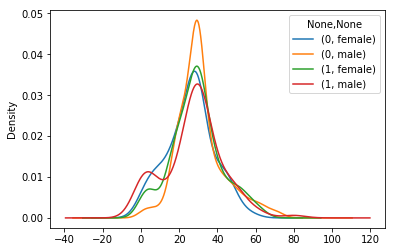

In [71]:
df_grouped_survived = df.groupby(['Survived', 'Sex'])
print(df_grouped_survived.sum())
df_grouped_survived.Age.plot.kde(legend=True)

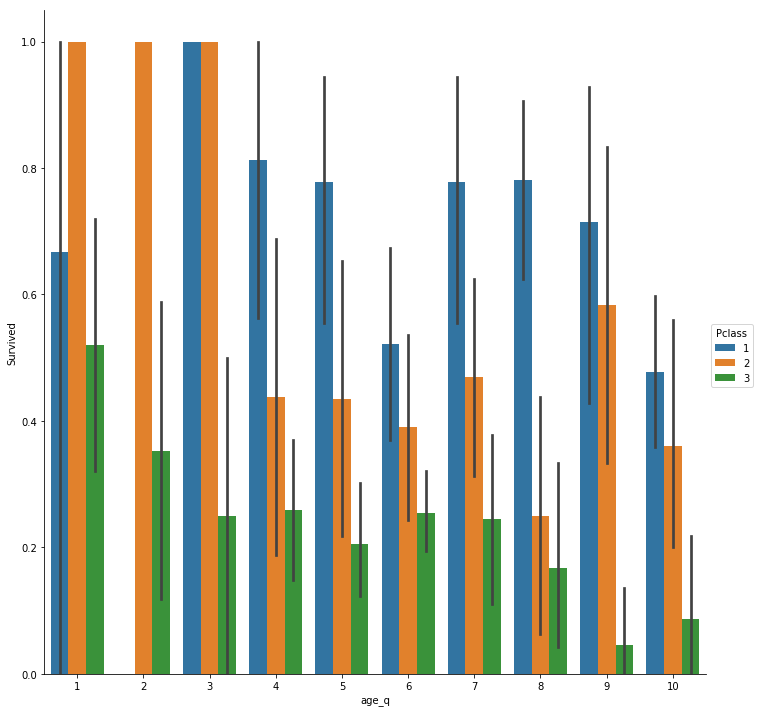

In [114]:
df["age_q"]= np.digitize(df.Age, range(0,50,5))
sns.factorplot(data=df,x='age_q', y='Survived',hue='Pclass', kind='bar',size=10)

In [87]:
df[(df.Age > 65)].count()

PassengerId    8
Survived       8
Pclass         8
Sex            8
Age            8
SibSp          8
Parch          8
Fare           8
Embarked       8
dtype: int64

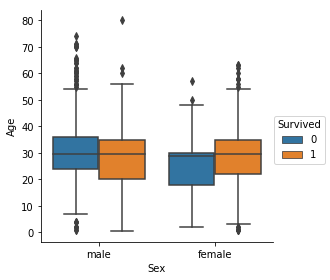

In [79]:
sns.factorplot(data=df,x='Sex',y='Age',hue='Survived', kind='box')

In [20]:
def eval_model(models, df):
    response = ['Survived']
    features = list(set(df.columns) - set(response + ['PassengerId']))
    df = df.dropna()
    X = df[features]
    y = df[response]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        
    for name, model in models.items():
        print('~~~ {} '.format(name))
        model.fit(X_train, y_train.values.ravel())
        y_pred = model.predict(X_test)
        print(model.score(X_test, y_test))
        print(f1_score(y_test, y_pred))


models = { 
    'LogisticRegression' : LogisticRegression() ,
    'RandomForestClassifier' : RandomForestClassifier(n_estimators=100),
    'GradientBoostingClassifier' : GradientBoostingClassifier(),
    # 'SVC' : SVC(kernel='poly', gamma=3),
    'XGBClassifier' : xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
}

print('\n~~~ df_dummies ~~~~~~~~~~~ ')
eval_model(models, df_dummies)


print('\n~~~ df_order_coding ~~~~~~ ')
eval_model(models, df_order_coding)

print('\n~~~ df_sum_encode ~~~~~~~~ ')
eval_model(models, df_sum_encode)


~~~ df_dummies ~~~~~~~~~~~ 
~~~ XGBClassifier 
0.830508474576
0.778761061947
~~~ LogisticRegression 
0.789830508475
0.735042735043
~~~ RandomForestClassifier 
0.779661016949
0.721030042918
~~~ GradientBoostingClassifier 
0.820338983051
0.760180995475

~~~ df_order_coding ~~~~~~ 
~~~ XGBClassifier 
0.827118644068
0.773333333333
~~~ LogisticRegression 
0.810169491525
0.754385964912
~~~ RandomForestClassifier 
0.8
0.748936170213
~~~ GradientBoostingClassifier 
0.823728813559
0.761467889908

~~~ df_sum_encode ~~~~~~~~ 
~~~ XGBClassifier 
0.820338983051
0.760180995475
~~~ LogisticRegression 
0.806779661017
0.753246753247
~~~ RandomForestClassifier 
0.786440677966
0.729613733906
~~~ GradientBoostingClassifier 
0.820338983051
0.75799086758


In [21]:
features = list(set(df.columns) - set(['Survived', 'PassengerId']))
y_pred = models['GradientBoostingClassifier'].predict(df_sum_encode[features])


pd.DataFrame(confusion_matrix(df_sum_encode.Survived, y_pred) / len(df_sum_encode))

,0,1
0,0.586981,0.029181
1,0.097643,0.286195


In [29]:
predictions = models['GradientBoostingClassifier'].predict(df_sum_encode_validation[features])
submission = pd.DataFrame({ 'PassengerId': df_validation['PassengerId'],
                            'Survived': predictions })
submission.to_csv('submission.csv', index=False)

In [23]:
def _(X):
    data = { c: X[c].value_counts().index[0] if X[c].dtype == np.dtype('O')  else X[c].median() 
                for c in X
           }
    return pd.Series(data, index=X.columns)
_(df[features].head())

Parch            0
Pclass           3
Embarked         S
SibSp            1
Fare          8.05
Age             35
Sex         female
dtype: object

In [45]:
pd.Series(pd.cut(df['Fare'], 5).unique()) # , [0, .25, 0.5, .75, .1])

0     (-0.512, 102.466]
1    (204.932, 307.398]
2    (102.466, 204.932]
3    (409.863, 512.329]
dtype: category
Categories (4, interval[float64]): [(-0.512, 102.466] < (102.466, 204.932] < (204.932, 307.398] < (409.863, 512.329]]